/var/folders/tt/f6p06kdx5m37ptqlnjdfxs5c0000gn/T/ipykernel_3677/652304408.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["date_added"] = pd.to_datetime(movies_df["date_added"])
/var/folders/tt/f6p06kdx5m37ptqlnjdfxs5c0000gn/T/ipykernel_3677/652304408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["date_added_year"] = movies_df["date_added"].dt.year


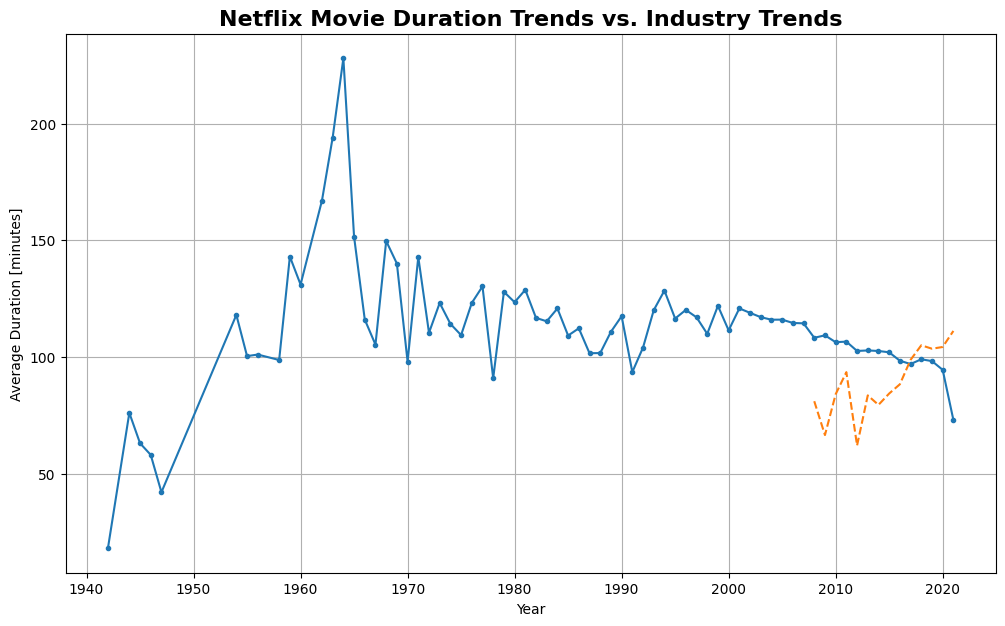

In [36]:
# import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data from csv
netflix_df = pd.read_csv("netflix.csv", index_col=0)

# save a movies DataFrame 
movies_df = netflix_df[netflix_df["type"].apply(str.upper) == "MOVIE"]

# extract 'date_added' year, and save it as a new column
movies_df["date_added"] = pd.to_datetime(movies_df["date_added"])
movies_df["date_added_year"] = movies_df["date_added"].dt.year

# group by Release Year and Date Added Year, average duration
duration_by_release_year = movies_df.groupby("release_year")["duration"].mean()
duration_by_added_year = movies_df.groupby("date_added_year")["duration"].mean()

# visualise
plt.figure(figsize=(12,7))
plt.plot(duration_by_release_year, marker = ".")
plt.plot(duration_by_added_year, linestyle="--")
plt.title("Netflix Movie Duration Trends vs. Industry Trends", fontsize=16, weight="bold")
plt.xlabel("Year")
plt.ylabel("Average Duration [minutes]")
plt.grid(True)
plt.show()